# Transmon

In [1]:
import scqubits as scq
import sys, os
os.chdir("../source")
import SQcircuit as sq
import matplotlib.pyplot as plt
import numpy as np

In [7]:
C = sq.Capacitor(20, 'GHz', Q=1e6)
JJ = sq.Junction(15.0,'GHz', A_c =1e-7)

circuitElements = {
    (0, 1): [C, JJ]
}

cr1 = sq.Circuit(circuitElements)

cr1.setTruncationNumbers([30])

numEig = 6
ng = np.linspace(-2, 2, 200)
eigenValues = np.zeros((numEig, len(ng)))

decay = {'capacitive':np.zeros_like(ng),
         "cc_noise":np.zeros_like(ng),
         "charge_noise":np.zeros_like(ng)}

for i in range(len(ng)):
    cr1.linkCharges({0: sq.Charge(ng[i], noise = 1e-4)})
    eigenValues[:, i], _ = cr1.run(numEig)

    for decType in decay:
        decay[decType][i]=cr1.decayRate(decType=decType, states=(1,0))

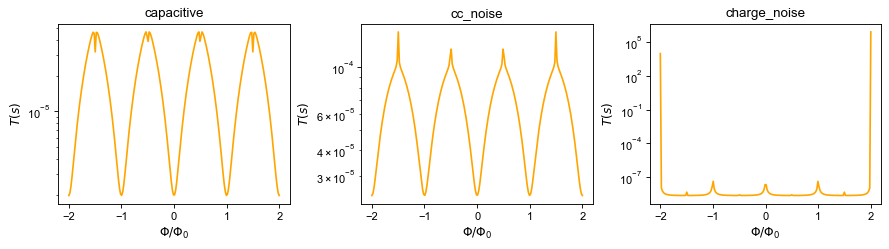

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(11, 3), constrained_layout=True,dpi =80)
for decType, ax in zip(decay, axs.flat):
    ax.semilogy(ng, 1/decay[decType],'orange')
    ax.set_title(decType)
    ax.set_xlabel(r"$\Phi/\Phi_0$")
    ax.set_ylabel(r"$T(s)$")

## Eigenfrequencies

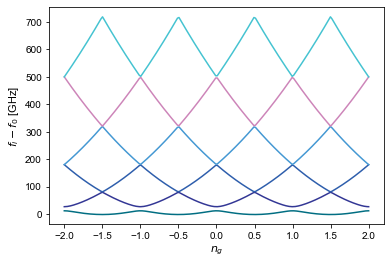

In [9]:
sq.unit.setFreq('GHz')
plt.figure()
for i in range(numEig):
    plt.plot(ng, (eigenValues[i, :]))

plt.xlabel(r"$n_g$")
plt.ylabel(r"$f_i-f_0$ [GHz]")
plt.show()

In [10]:
scq.settings.T1_DEFAULT_WARNING=False

decay = {'capacitive':np.zeros_like(ng),
         "cc_noise":np.zeros_like(ng),
         "charge_noise":np.zeros_like(ng)}
for i in range(len(ng)):
    tmon = scq.Transmon(EJ=15.0,EC=20, ng=ng[i]+0.5, ncut=30)
    decay['capacitive'][i] = tmon.t1_capacitive(i=1, j=0, Q_cap=1e6, get_rate=True)/1e-9
    decay["cc_noise"][i] = tmon.tphi_1_over_f_cc(A_noise=15*1e-7, i=1, j=0, get_rate=True)/1e-9
    decay["charge_noise"][i] = tmon.tphi_1_over_f_ng(A_noise=1e-4, i=1, j=0, get_rate=True)/1e-9

# tmon = scq.Transmon(EJ=15.0,EC=20,ng=0.25,ncut=30)
# tmon.plot_evals_vs_paramvals('ng', ng_list, evals_count=6)

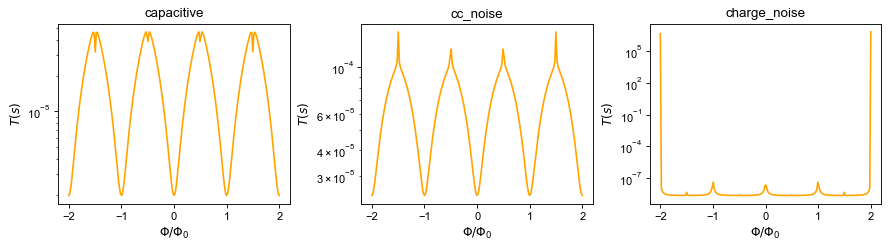

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(11, 3), constrained_layout=True,dpi =80)
for decType, ax in zip(decay, axs.flat):
    ax.semilogy(ng, 1/decay[decType],'orange')
    ax.set_title(decType)
    ax.set_xlabel(r"$\Phi/\Phi_0$")
    ax.set_ylabel(r"$T(s)$")